<a href="https://colab.research.google.com/github/rodrigorissettoterra/analise-de-gorjetas/blob/main/Seaborn_Analisando_gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de gorjetas

##Importando a base de dados e traduzindo conteúdos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Seaborn/tips.csv')

In [3]:
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [4]:
#Verificando quais são as colunas do nosso DataFrame

dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
#Renomear as colunas
renomear = {
    'total_bill':'valor_da_conta', 
    'tip':'gorjeta', 
    'dessert':'sobremesa', 
    'day':'dia_da_semana', 
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'
    }

gorjetas = dados.rename(columns = renomear)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [6]:
#Traduzindo os termos 'No' e 'Yes' para PT-BR

sim_nao = {
    'No':'Não',
    'Yes':'Sim'
    }

gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [7]:
#Verificando quais dias da semana existem no DataFrame
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
#Traduzindo os dias da semana para PT-BR
dia = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dia)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3
240,27.18,2.00,Sim,Sábado,Dinner,2
241,22.67,2.00,Sim,Sábado,Dinner,2
242,17.82,1.75,Não,Sábado,Dinner,2


In [9]:
#Verificando quantas horas do dia existem no DataFrame

gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
#Traduzindo as horas do dia para PT-BR
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
    }

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


#Visualizações

In [11]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import seaborn as sns

In [13]:
#Verificando a versão do Seaborn
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: missingno


##Análise I - Valor da conta e da gorjeta

In [14]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

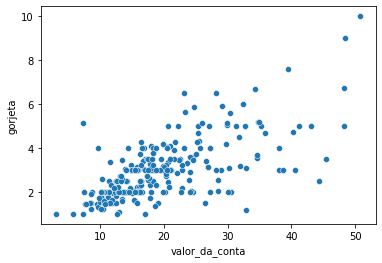

In [15]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

Visualmente, o valor da gorjeta aumenta com o aumento do valor da conta

In [16]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))

A base de dados contém 244 registros 



###Criando o campo porcentagem da gorjeta

In [17]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


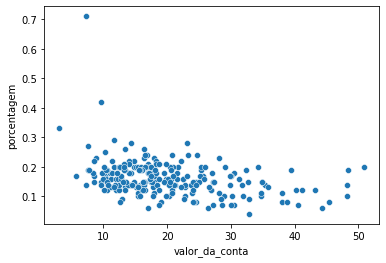

In [18]:
porcentagem_conta = sns.scatterplot( x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

Visualmente, o valor da conta não é proporcional ao valor da gorjeta

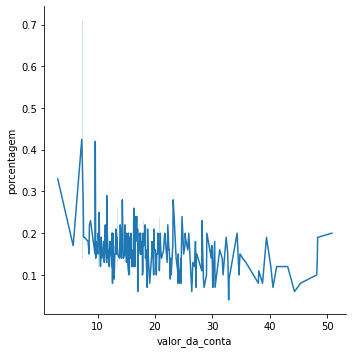

In [19]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

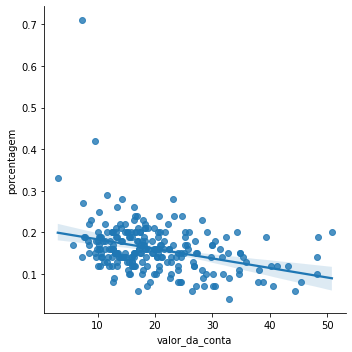

In [20]:
porcentagem_tendencia = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
porcentagem_tendencia

##Análise II - Sobremesa

###A sobremesa influencia no valor da gorjeta?

In [21]:
#Pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [22]:
#Não pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


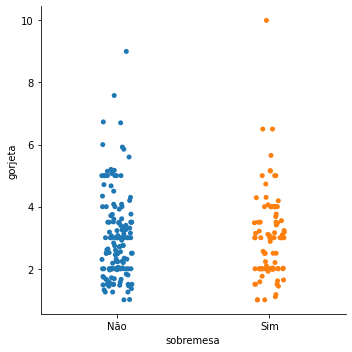

In [23]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

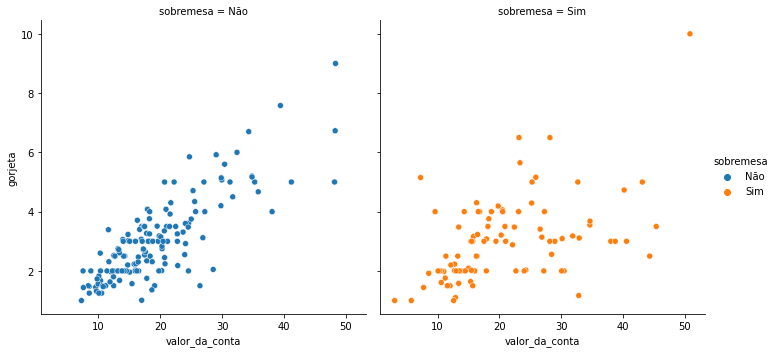

In [24]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

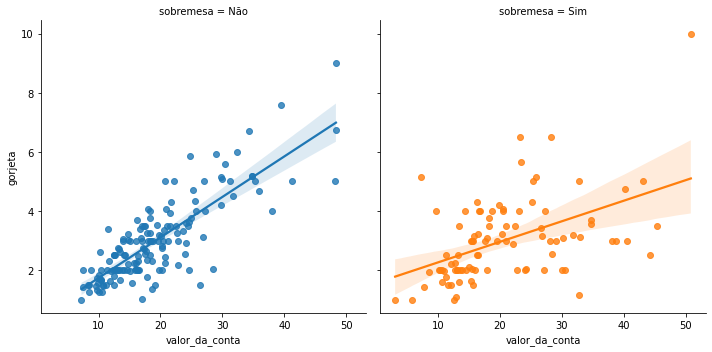

In [25]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data=gorjetas)

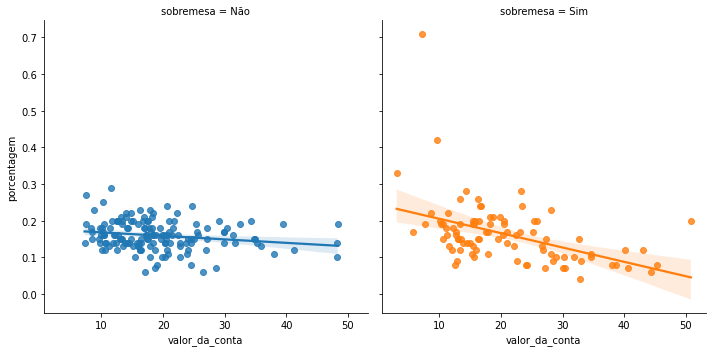

In [26]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data=gorjetas)

Visualmente existe uma diferença no valor da gorjeta entre aqueles que pediram e não pediram sobremesa.

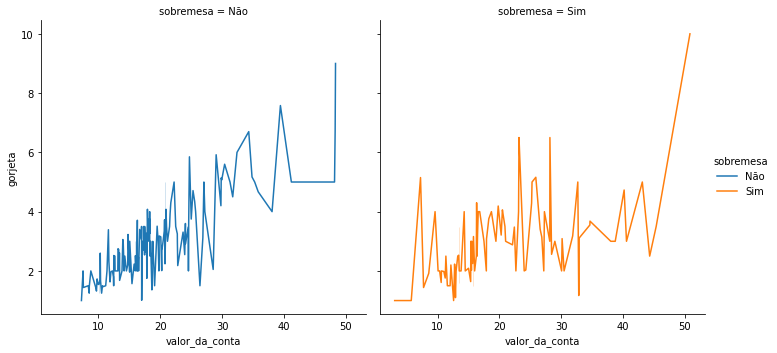

In [27]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', kind = 'line', data = gorjetas)

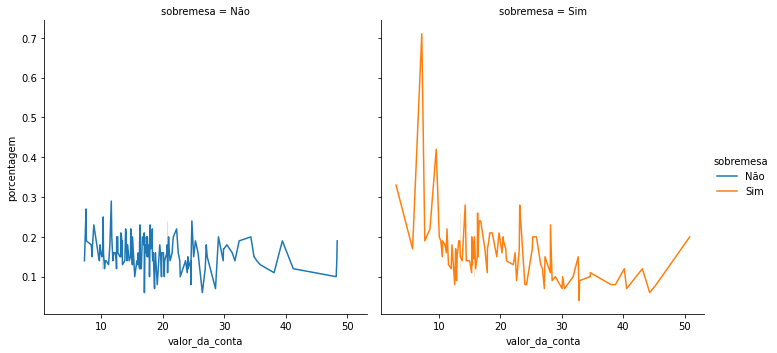

In [28]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', kind = 'line', data = gorjetas)

###Teste de hipótese

H<sup>null</sup> => A distribuição da taxa da gorjeta é a mesma em ambos os grupos</br>
H<sup>alt</sup> => A distribuição da taxa da gorjeta NÃO é a mesma em ambos os grupos

In [29]:
from scipy.stats import ranksums

In [30]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [31]:
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [32]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [99]:
r1 = ranksums(sobremesa, sem_sobremesa)
print('O valor valor de pvalue é {}'.format(r1.pvalue))

O valor valor de pvalue é 0.5266635660124415


pvalue = 0,5266... significa que apesar das gorjetas diferentes, matematicamente essa diferente é diferente, então, continuamos com nossa hipótese nula. Conclusão: A distribuição da taxa da gorjeta éa mesma nos dois grupos.

Para aceitar a hipótese alternativa, pvalue < 0,05.

In [35]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Análise III - Dia da semana

In [40]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

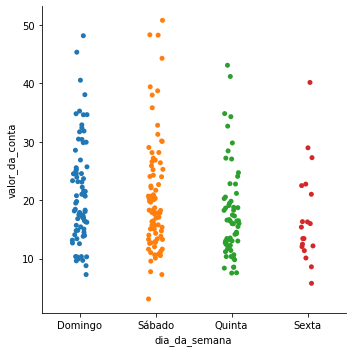

In [41]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

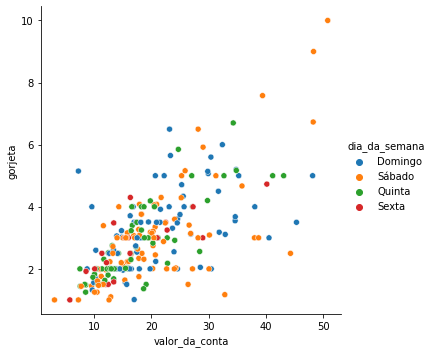

In [42]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

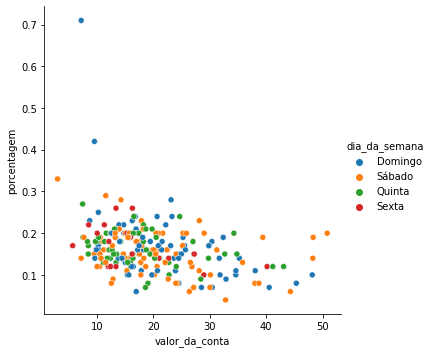

In [43]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

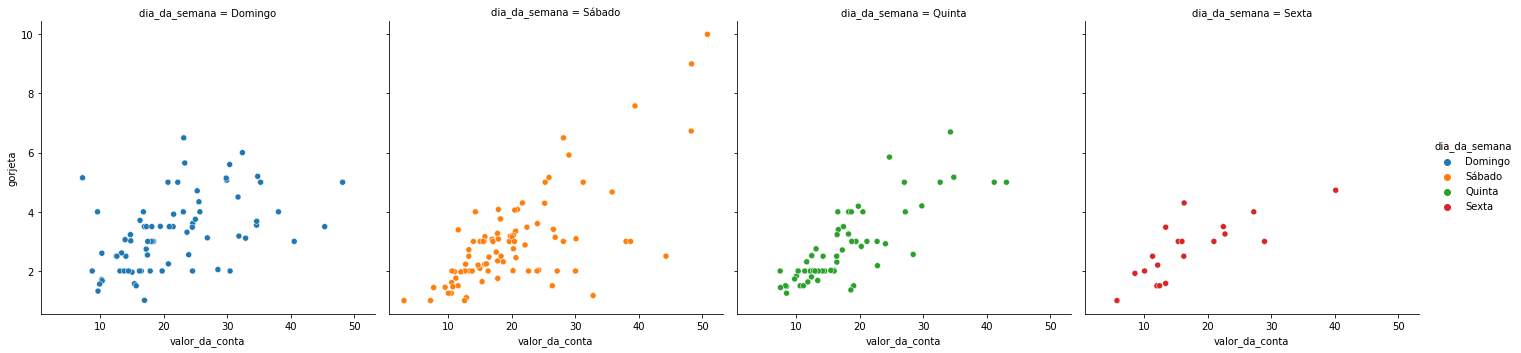

In [44]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

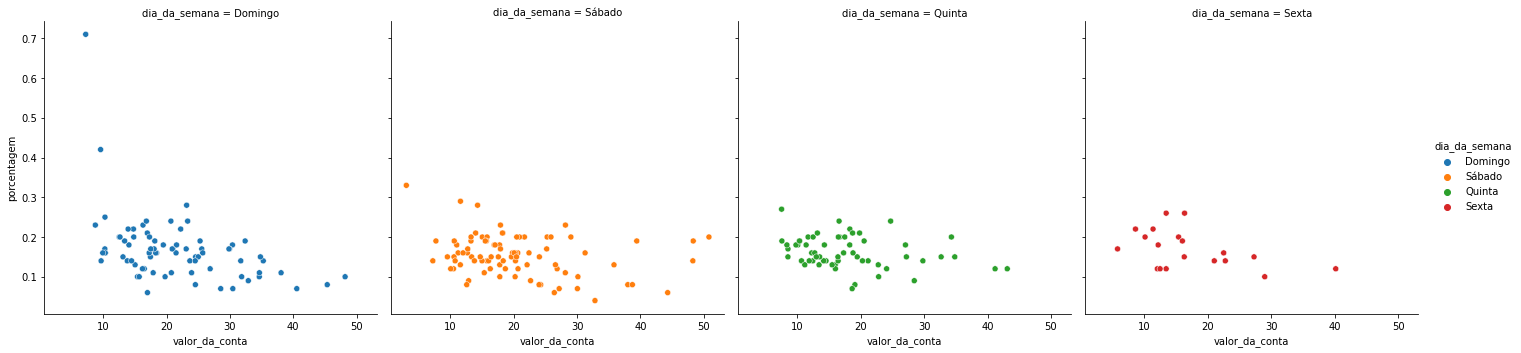

In [46]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

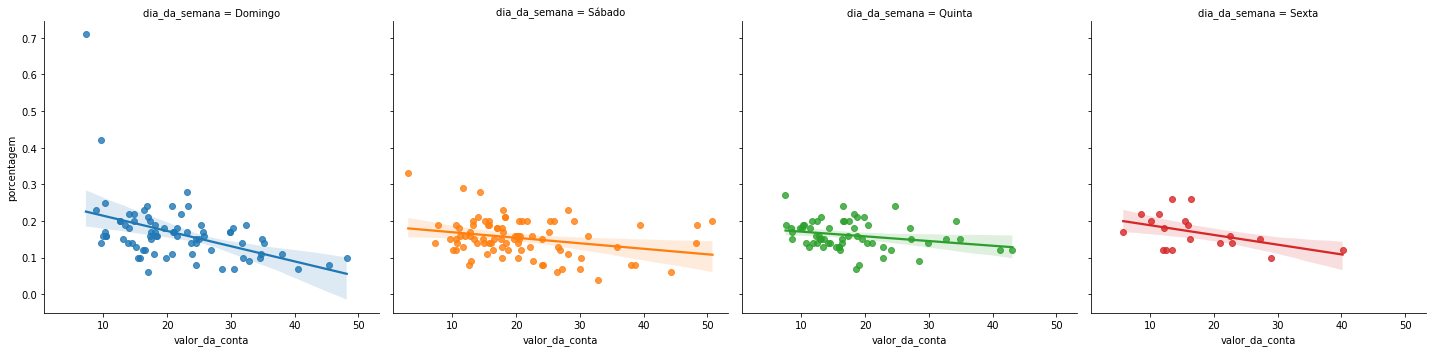

In [47]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [49]:
média_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(média_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [56]:
#tirando uma coluna
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [58]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

###Teste de hipótese

####Sábado e Domingo

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no sábado e no domingo

In [61]:
#Gorjetas de domingo
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [62]:
#Gorjetas de sábado
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [100]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

print('O valor de p-value é: {}'.format(r2.pvalue))

O valor de p-value é: 0.3576728477868443


Se p-value < 0,05 rejeitaríamos a Hipótese Nula.</br>
Como p-value > 0,05, aceitamos a Hipótese Nula, de que a conta é igual no sábado e no domingo</p></br>
**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e no domingo

####Sábado e Quinta

**H<sup>null</sup>**
>A distribuição do valor da conta é igual no sábado e na quinta

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no sábado e na quinta

In [67]:
#Gorjetas de domingo
valor_conta_quinta = gorjetas.query("dia_da_semana == 'Quinta'").valor_da_conta
valor_conta_quinta

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
202    13.00
203    16.40
204    20.53
205    16.47
243    18.78
Name: valor_da_conta, Length: 62, dtype: float64

In [68]:
#Gorjetas de sábado
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [101]:
r3 = ranksums(valor_conta_quinta, valor_conta_sabado)

print('O valor de p-value é: {}'.format(r3.pvalue))

O valor de p-value é: 0.046688533353323416


Como p-value < 0,05, rejeitamos a Hipótese Nula, de que a conta é igual no sábado e no domingo</p></br>

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no sábado e na quinta

##Análise IV - Horário da refeição

In [70]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

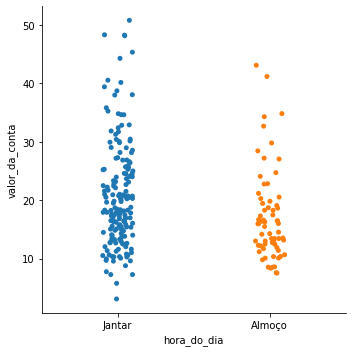

In [71]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

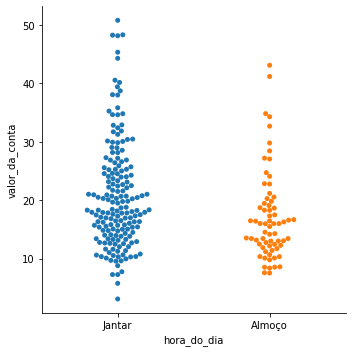

In [72]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

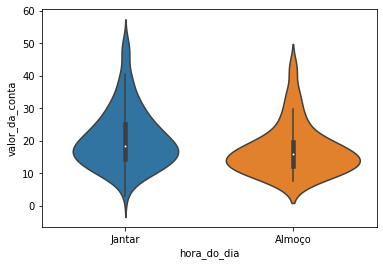

In [75]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

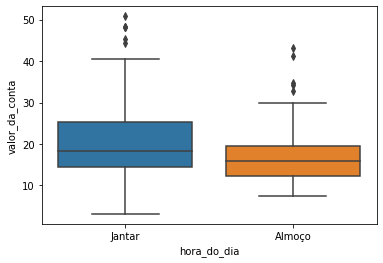

In [76]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [81]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

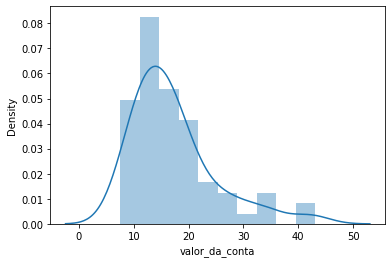

In [86]:
sns.distplot(almoco)

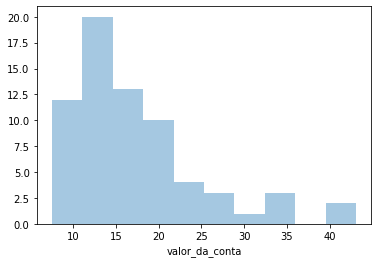

In [85]:
sns.distplot(almoco, kde = False)

In [87]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

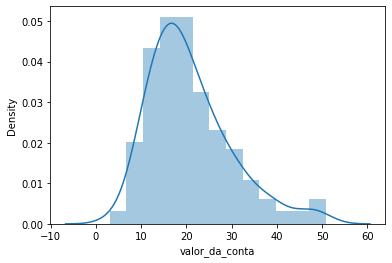

In [89]:
sns.distplot(jantar)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


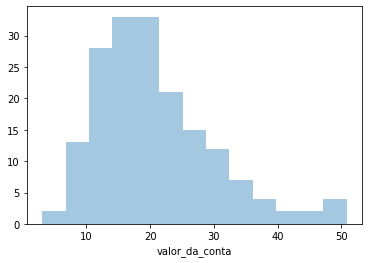

In [90]:
sns.distplot(jantar, kde = False)

###Teste de hipótese

#####Analisando a Gorjeta

In [94]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


**H<sup>null</sup>**
>A distribuição do valor da conta é igual no jantar e no almoço.

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no jantar e no almoço.

In [103]:
r4 = ranksums(jantar,almoco)
print('O valor do p-value é de: {}'.format(r4.pvalue))

O valor do p-value é de: 0.0011791039723641672


Como p-value < 0,05, rejeitamos a Hipótese Nula.

**H<sup>alt</sup>**
>A distribuição do valor da conta NÃO é igual no jantar e no almoço.

#####Analisando a Porcentagem

**H<sup>null</sup>**
>A distribuição da porcentagem é igual no jantar e no almoço.

**H<sup>alt</sup>**
>A distribuição da porcentagem NÃO é igual no jantar e no almoço.

In [105]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [106]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [108]:
r5 = ranksums(porcentagem_almoco,porcentagem_jantar)
print('O valor do p-value é de: {}'.format(r5.pvalue))

O valor do p-value é de: 0.2602493995587126


Como p-value > 0,05, aceitamos a Hipóetese Nula.

**H<sup>null</sup>**
>A distribuição da porcentagem é igual no jantar e no almoço.